In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.read_csv("kc_house_data.csv")
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать данные 
1.2 Изучите стоимости недвижимости
1.3 Изучите распределение квадратуры жилой

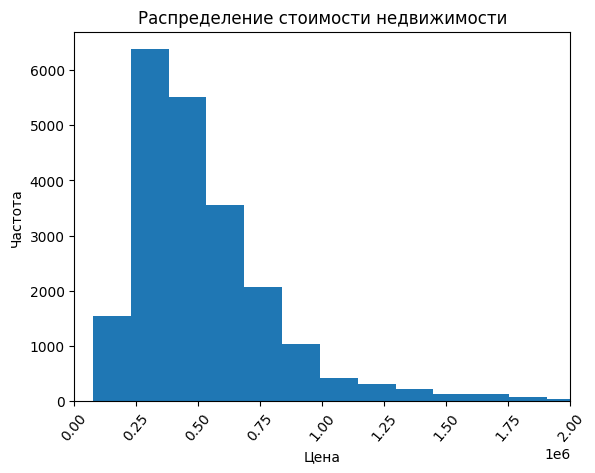

In [5]:
plt.hist(df['price'], bins=50)
plt.xlim(0, 2_000_000)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.xticks(rotation=50)
plt.show()


1.2. Из графика видно, что большинство объектов недвижимости по стоимости находятся в диапазоне от 0,25 до 0,6 млн. 

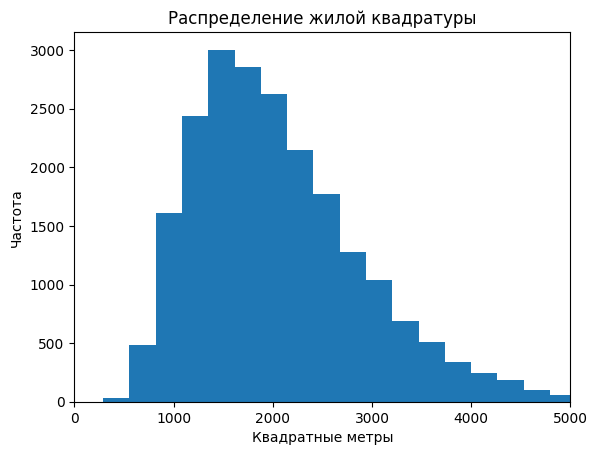

In [7]:
plt.hist(df['sqft_living'], bins=50)
plt.xlim(0, 5_000)
plt.title('Распределение жилой квадратуры')
plt.xlabel('Квадратные метры')
plt.ylabel('Частота')
plt.show()

1.3.По распределению квадратуры из графика видно, что превалируют объекты недвижимости в диапазоне от 1000 до 2500.

2.1.4 Изучите распределение года постройки

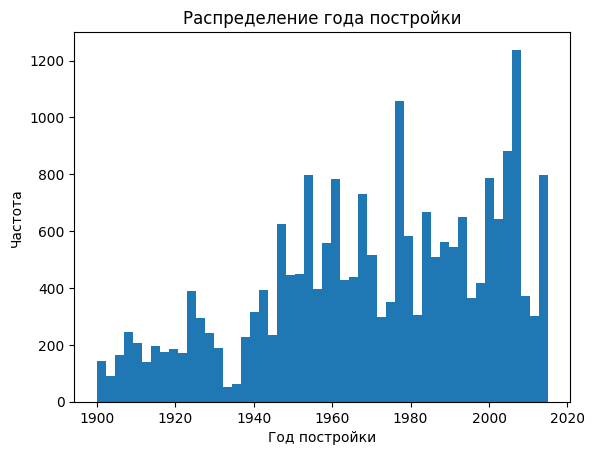

In [8]:
plt.hist(df['yr_built'], bins=50)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Частота')
plt.show()

Из графика видно, что в определенные временные периоды было построоено больше объектов недвихимости - так например 1978-1980 год, 2010.

2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

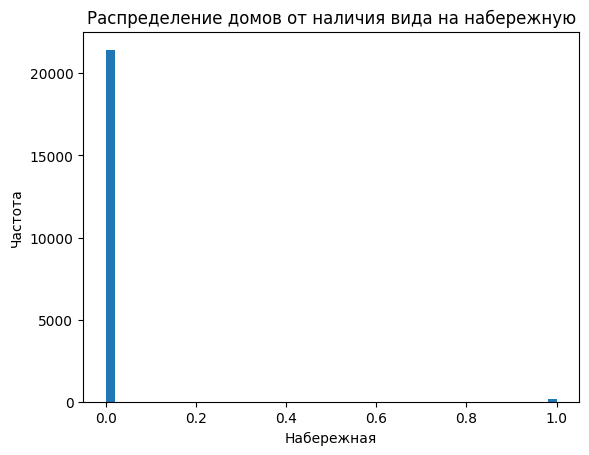

In [9]:
plt.hist(df['waterfront'], bins=50)
plt.title('Распределение домов от наличия вида на набережную')
plt.xlabel('Набережная')
plt.ylabel('Частота')
plt.show()

У большинства объектов недвижимости отсутствует вид на набережную.

2.2 Изучите распределение этажей домов
2.2 Изучите распределение состояния домов

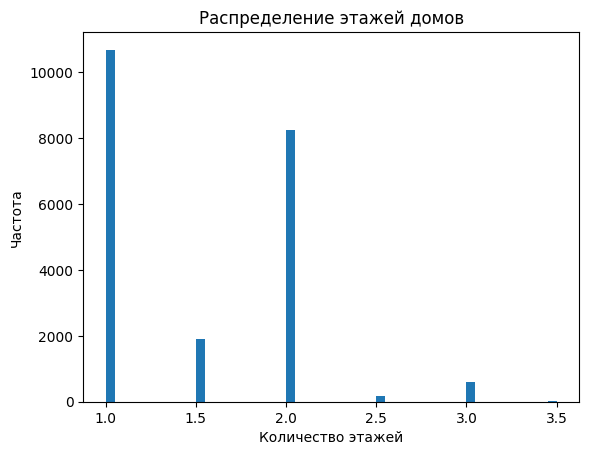

In [3]:
plt.hist(df['floors'], bins=50)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Частота')
plt.show()

Преобладает 1 и 2-х этажная застройка.

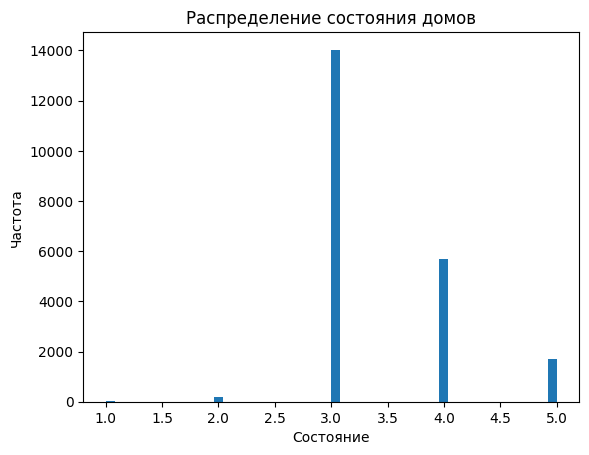

In [7]:
plt.hist(df['condition'], bins=50)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Частота')
plt.show()

Большиство объектов недвижимости имеют среднее состояние.

Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

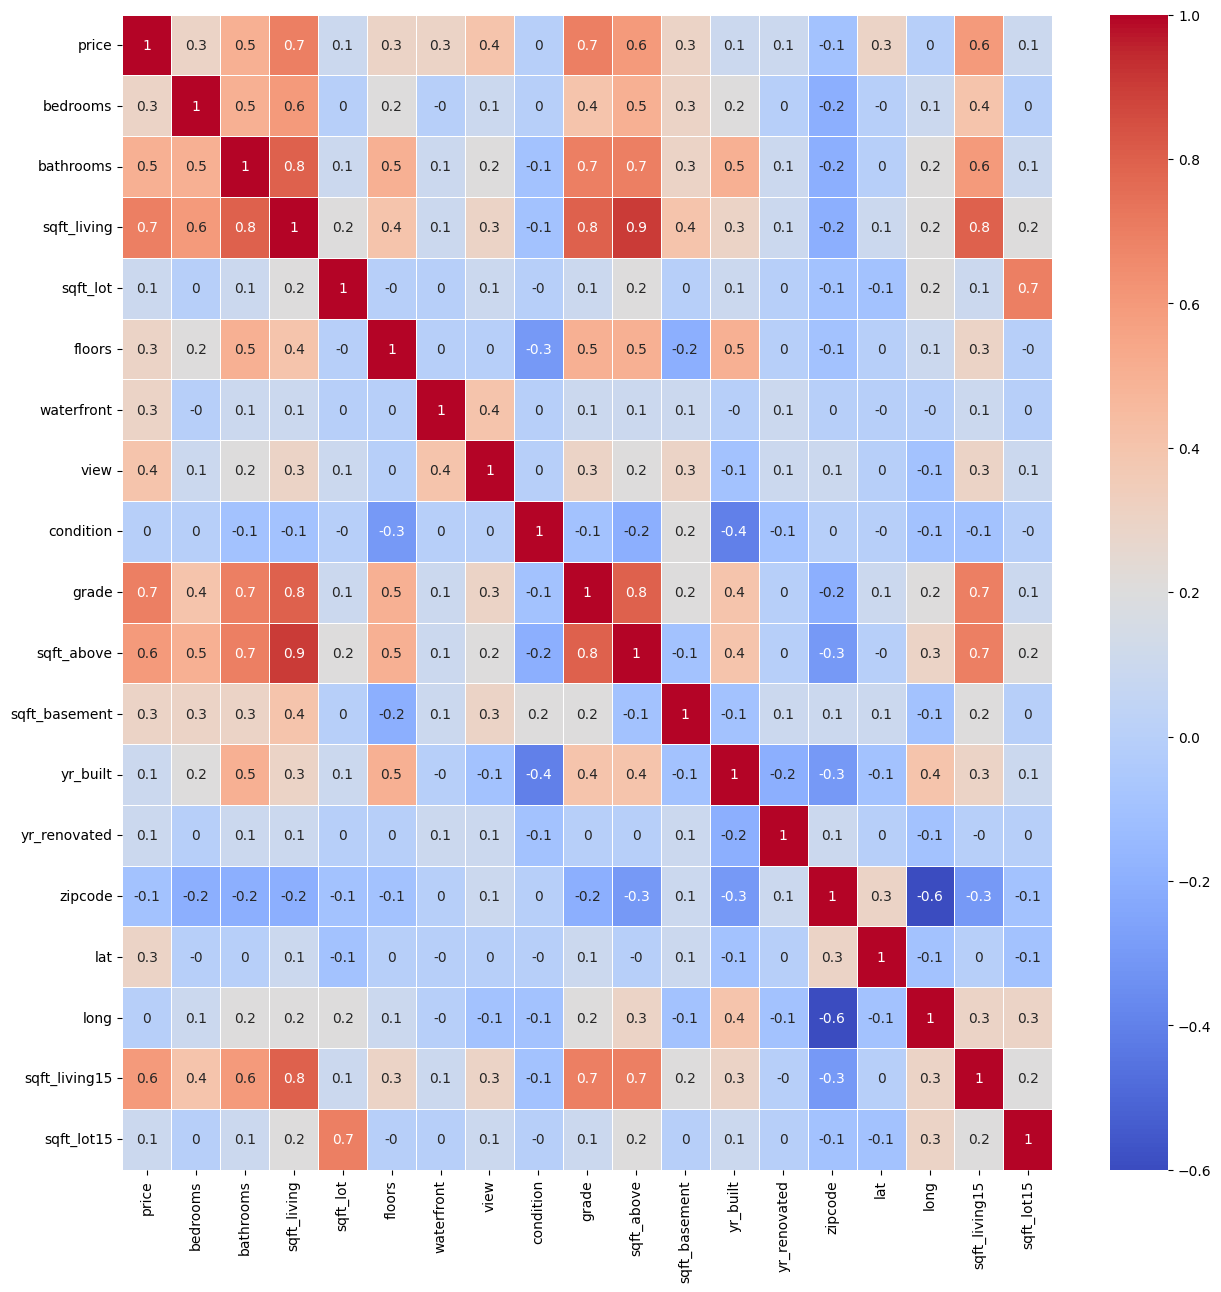

In [4]:
import seaborn as sns
plt.figure(figsize=[15,15])
sns.heatmap(df.drop(columns=['id','date']).corr().round(1), annot=True, linewidths=.5, cmap='coolwarm');

На стоимость недвижимости влияют:

Кол-во ванных комнат(0.5)
Жилая площадь(0.7)
Класс жилья(0.7)
Площадь дома без подвала(0.6)
От изменения жилой площади после ремонта в 2015г(0.6)

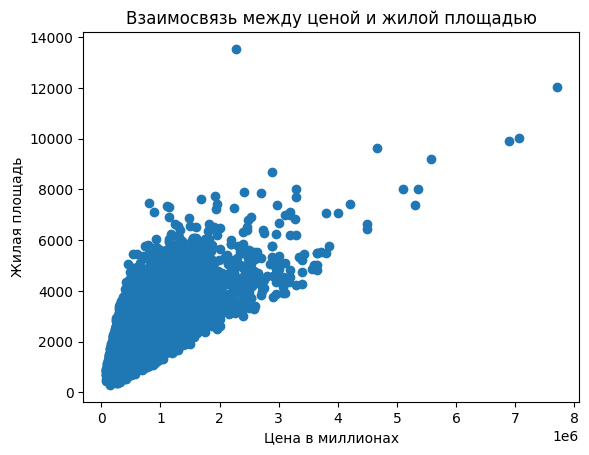

In [14]:
plt.scatter(df['price'], df['sqft_living'])
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylabel('Жилая площадь')
plt.show()

Чем больше жилая площадь, тем выше стоимость - вывод: прямая зависимость.

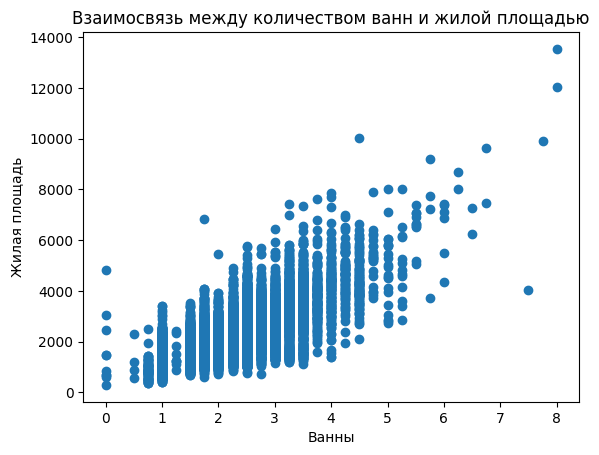

In [15]:
plt.scatter(df['bathrooms'], df['sqft_living'])
plt.title('Взаимосвязь между количеством ванн и жилой площадью')
plt.xlabel('Ванны')
plt.ylabel('Жилая площадь')
plt.show()

Прямая зависимость между кол-вом ванн и жилой площадью - чем больше площадь, тем больше ванных комнат.

<Axes: ylabel='price'>

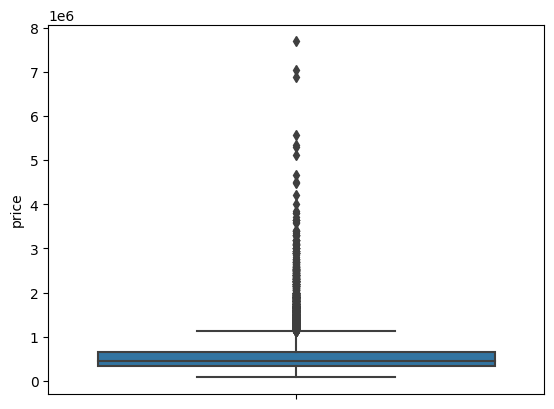

In [17]:
sns.boxplot(y=df['price'], whis=1.5)

Большинство обьектов недвижимости по стоимости меньше 1 млн и больше 0,5 млн.

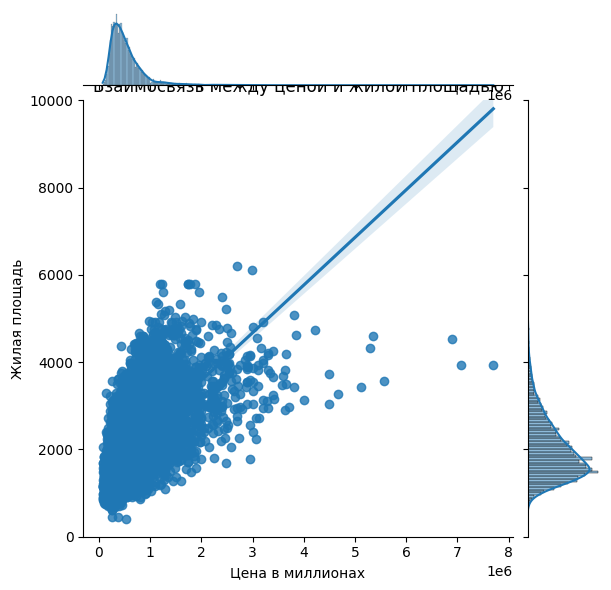

In [18]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg')
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylim(0, 10000)
plt.ylabel('Жилая площадь')
plt.show()

Из графика видно, что чем больше жилая прощадь, тем выше цена - прямая линейная зависимость.

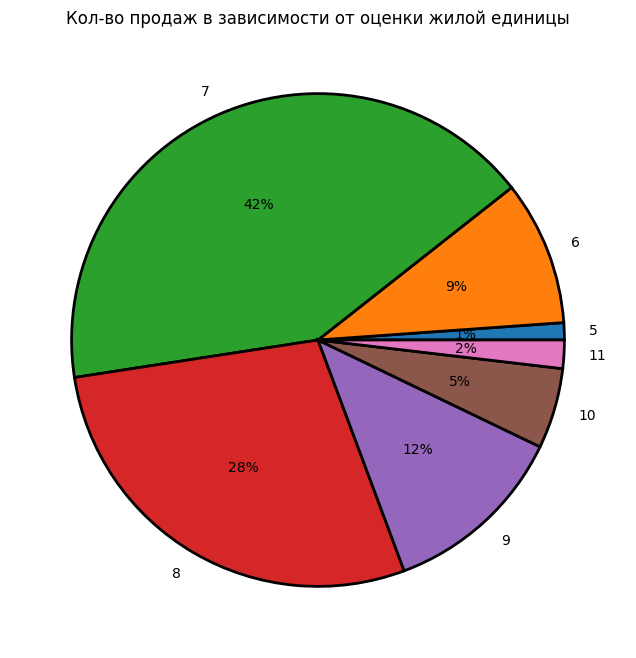

In [14]:
plt.figure(figsize=(8, 8))
d = df.groupby('grade').agg({"price": "count"})
d = d[d['price'] > 200]
plt.title('Кол-во продаж в зависимости от оценки жилой единицы')
plt.pie(d['price'],
        labels=d.index,
        autopct='%1.0f%%',
        wedgeprops={ 'linewidth' : 2, 'edgecolor' : 'black' }
        );

Из графика видно, что пользуются спросом недвижимость с высокой оценкой 7-8.